# Step 1: Import Libraries

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 2: Load and Preprocess Data

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input image so that each pixel value is between 0 to 1.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Step 3: Build the Neural Network Model

In [8]:
model = models.Sequential([
  layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 1D array
  layers.Dense(512, activation='relu'),  # Dense hidden layer with 512 neurons
  layers.Dropout(0.2),                   # Dropout layer to prevent overfitting
  layers.Dense(10, activation='softmax') # Output layer with 10 neurons (digits 0-9)
])

# Step 4: Compile the Model

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model

In [12]:
model.fit(x_train, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0562 - accuracy: 0.9821
Epoch 2/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0464 - accuracy: 0.9848
Epoch 3/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0381 - accuracy: 0.9873
Epoch 4/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0310 - accuracy: 0.9894
Epoch 5/7
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0284 - accuracy: 0.9903
Epoch 6/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0255 - accuracy: 0.9914
Epoch 7/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0238 - accuracy: 0.9921


# Step 6: Evaluate the Model

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0670 - accuracy: 0.9829
Test Accuracy: 0.9829000234603882


313/313 [==============================] - 3s 7ms/step


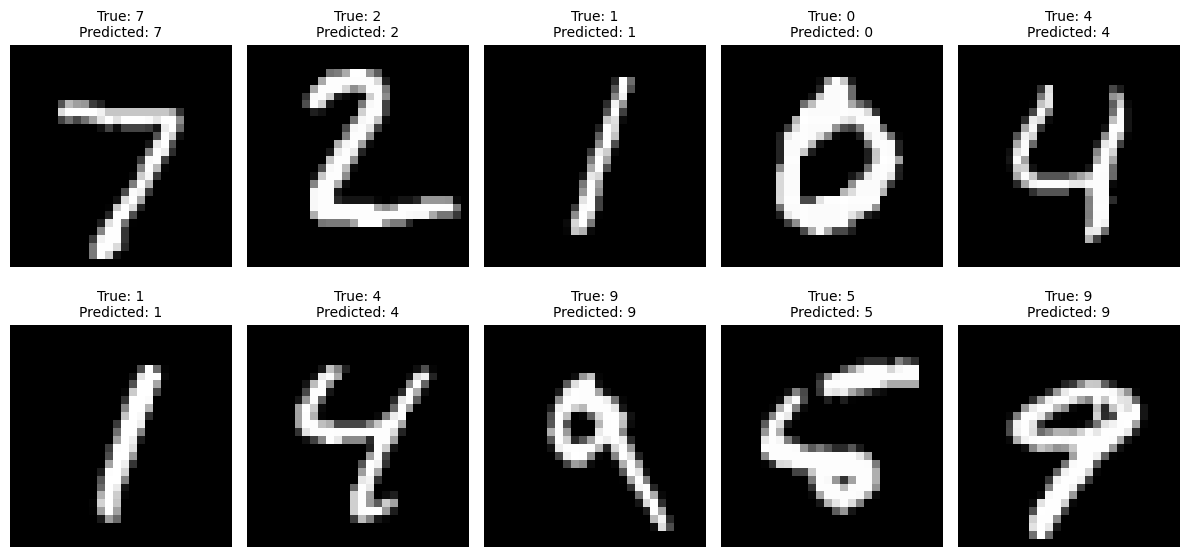

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Plot the first 10 test images with their true and predicted labels
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}\nPredicted: {predicted_labels[i]}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()
